In [5]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import time

In [25]:
url = "https://www.amazon.com/s?k=laptop"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/139.0.0.0 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9",
    "Cookie": 
    'session-id=140-9980693-2487219; session-id-time=2082787201l; i18n-prefs=USD; lc-main=en_US; sp-cdn="L5Z9:ID"; ubid-main=131-6880430-1944158; session-token=ta+dLS8XMKTWkprlgMq6h7Fm+wxJIfAkqkvo3awcKI0C4j5erhXVbVU5kDkzZQyNgwrQAGxfP2RHWvsK922SLJWpqop8HMA6eyh0y9m6xo3R6zuG/5/tl3pLU8Tf61ynEOQb6fjAxxi05N/biFa4rkCNhgt8uzAyH8sZFzWiKBxcDUn1oSYNwLWlHmgYtNpmL4rU5pj/jRSb5PEWbk3MBg4DlMdgIP7yWZ/KgpNq1SdgGHTOEG13piVVGFUAPq19zJSpAibLcERhpfRLRQoCsZ+xph6P+kZkAPk8LqOpx003Gx9IpUOnRyIBChNRPckGwvhnIyXYMUBBFAxF1RLlNEsrY1Bvvxk7; rxc=AC/IfEZcwpBM3MAJGyw; csm-hit=tb:NF2H9J2FHGPXKBJXY3YG+s-NF2H9J2FHGPXKBJXY3YG|1756455115453&t:1756455115453&adb:adblk_yes'
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, "html.parser")
products = soup.find_all("div", class_="a-section a-spacing-small a-spacing-top-small")


In [21]:
from urllib.parse import urljoin

base_url = "https://www.amazon.com"
url = "https://www.amazon.com/s?k=laptop"
urls = []

while url:
    urls.append(url)
    print(f"Scraping: {url}")
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    # cari tombol Next
    next_page = soup.find("a", class_="s-pagination-item s-pagination-next s-pagination-button s-pagination-button-accessibility s-pagination-separator")
    if next_page and next_page.get("href"):
        url = urljoin(base_url, next_page.get("href"))
    else:
        url = None  # kalau sudah tidak ada Next → stop

urls

Scraping: https://www.amazon.com/s?k=laptop
Scraping: https://www.amazon.com/s?k=laptop&page=2&xpid=ddOOBkON901Cq&qid=1756471622&ref=sr_pg_1
Scraping: https://www.amazon.com/s?k=laptop&page=3&qid=1756471624&xpid=ddOOBkON901Cq&ref=sr_pg_2
Scraping: https://www.amazon.com/s?k=laptop&page=4&qid=1756471625&xpid=ddOOBkON901Cq&ref=sr_pg_3
Scraping: https://www.amazon.com/s?k=laptop&page=5&qid=1756471627&xpid=ddOOBkON901Cq&ref=sr_pg_4
Scraping: https://www.amazon.com/s?k=laptop&page=6&qid=1756471628&xpid=ddOOBkON901Cq&ref=sr_pg_5
Scraping: https://www.amazon.com/s?k=laptop&page=7&qid=1756471630&xpid=ddOOBkON901Cq&ref=sr_pg_6
Scraping: https://www.amazon.com/s?k=laptop&page=8&qid=1756471631&xpid=ddOOBkON901Cq&ref=sr_pg_7
Scraping: https://www.amazon.com/s?k=laptop&page=9&qid=1756471632&xpid=ddOOBkON901Cq&ref=sr_pg_8
Scraping: https://www.amazon.com/s?k=laptop&page=10&qid=1756471634&xpid=ddOOBkON901Cq&ref=sr_pg_9
Scraping: https://www.amazon.com/s?k=laptop&page=11&qid=1756471635&xpid=ddOOBkON90

['https://www.amazon.com/s?k=laptop',
 'https://www.amazon.com/s?k=laptop&page=2&xpid=ddOOBkON901Cq&qid=1756471622&ref=sr_pg_1',
 'https://www.amazon.com/s?k=laptop&page=3&qid=1756471624&xpid=ddOOBkON901Cq&ref=sr_pg_2',
 'https://www.amazon.com/s?k=laptop&page=4&qid=1756471625&xpid=ddOOBkON901Cq&ref=sr_pg_3',
 'https://www.amazon.com/s?k=laptop&page=5&qid=1756471627&xpid=ddOOBkON901Cq&ref=sr_pg_4',
 'https://www.amazon.com/s?k=laptop&page=6&qid=1756471628&xpid=ddOOBkON901Cq&ref=sr_pg_5',
 'https://www.amazon.com/s?k=laptop&page=7&qid=1756471630&xpid=ddOOBkON901Cq&ref=sr_pg_6',
 'https://www.amazon.com/s?k=laptop&page=8&qid=1756471631&xpid=ddOOBkON901Cq&ref=sr_pg_7',
 'https://www.amazon.com/s?k=laptop&page=9&qid=1756471632&xpid=ddOOBkON901Cq&ref=sr_pg_8',
 'https://www.amazon.com/s?k=laptop&page=10&qid=1756471634&xpid=ddOOBkON901Cq&ref=sr_pg_9',
 'https://www.amazon.com/s?k=laptop&page=11&qid=1756471635&xpid=ddOOBkON901Cq&ref=sr_pg_10',
 'https://www.amazon.com/s?k=laptop&page=12&qid=1

In [22]:
clean_urls = [u for u in urls if u is not None]
clean_urls

['https://www.amazon.com/s?k=laptop',
 'https://www.amazon.com/s?k=laptop&page=2&xpid=ddOOBkON901Cq&qid=1756471622&ref=sr_pg_1',
 'https://www.amazon.com/s?k=laptop&page=3&qid=1756471624&xpid=ddOOBkON901Cq&ref=sr_pg_2',
 'https://www.amazon.com/s?k=laptop&page=4&qid=1756471625&xpid=ddOOBkON901Cq&ref=sr_pg_3',
 'https://www.amazon.com/s?k=laptop&page=5&qid=1756471627&xpid=ddOOBkON901Cq&ref=sr_pg_4',
 'https://www.amazon.com/s?k=laptop&page=6&qid=1756471628&xpid=ddOOBkON901Cq&ref=sr_pg_5',
 'https://www.amazon.com/s?k=laptop&page=7&qid=1756471630&xpid=ddOOBkON901Cq&ref=sr_pg_6',
 'https://www.amazon.com/s?k=laptop&page=8&qid=1756471631&xpid=ddOOBkON901Cq&ref=sr_pg_7',
 'https://www.amazon.com/s?k=laptop&page=9&qid=1756471632&xpid=ddOOBkON901Cq&ref=sr_pg_8',
 'https://www.amazon.com/s?k=laptop&page=10&qid=1756471634&xpid=ddOOBkON901Cq&ref=sr_pg_9',
 'https://www.amazon.com/s?k=laptop&page=11&qid=1756471635&xpid=ddOOBkON901Cq&ref=sr_pg_10',
 'https://www.amazon.com/s?k=laptop&page=12&qid=1

In [26]:
titles = [
    p.find("a", class_="a-link-normal s-line-clamp-2 s-link-style a-text-normal").get_text(strip=True)
    for p in products
    if p.find("a", class_="a-link-normal s-line-clamp-2 s-link-style a-text-normal")
]
titles

['HP 14 Laptop, Intel Celeron N4020, 4 GB RAM, 64 GB Storage, 14-inch Micro-edge HD Display, Windows 11 Home, Thin & Portable, 4K Graphics, One Year of Microsoft 365 (14-dq0040nr, Snowflake White)',
 'Laptop, Laptop Computer with Intel N97 Processor(Up to 3.6GHz), 16GB DDR4 512GB SSD Windows 11 Laptop for Home Business and Student, 1080P, USB3.2,Long Battery Life',
 'HP Laptop Computer for Student & Business, 1-Year Office365, 4GB RAM, 384GB Storage (128GB UFS + 256GB Hub Docking Set), 14 Inch, Intel 4-Core Processor (Beat i3-1115G4), WiFi 6, BT 5.4, Windows 11 S',
 'ASUS ROG Strix G16 (2025) Gaming Laptop, 16” FHD+ 16:10 165Hz/3ms Display, NVIDIA® GeForce RTX™ 5060 Laptop GPU, Intel® Core™ i7 Processor 14650HX, 16GB DDR5, 1TB Gen 4 SSD, Wi-Fi 7, Windows 11 Home',
 'Laptop 16-inch 8GB DDR 256GB SSD Portable Laptop,Expandable to 1TB Pentium Quad-core CPU up to 2.64 GHz 9000mAh Battery Mini HDMI Interface USB3.0 Interface Dual-Band WiFi Webcam Slim laptops',
 'Acer Aspire 3 A315-24P-R7VH

In [32]:
ratings = [
    (p.find("a", class_="a-popover-trigger a-declarative").get("aria-label").split()[0]
     if p.find("a", class_="a-popover-trigger a-declarative") else None)
    for p in products
]
ratings

['4.1',
 '5.0',
 '4.6',
 '4.6',
 '5.0',
 '4.2',
 '4.1',
 '4.2',
 '4.2',
 '4.4',
 '4.3',
 '4.2',
 '4.1',
 '5.0',
 '4.3',
 '4.2']

In [28]:
prices = [
    (p.find("span", class_="a-offscreen").get_text(strip=True).split()[0]
     if p.find("span", class_="a-offscreen") else None)
    for p in products
]
prices

['$172.16',
 '$369.00',
 None,
 '$1,274.99',
 '$199.99',
 '$319.99',
 '$309.00',
 '$524.00',
 '$579.00',
 '$189.00',
 '$172.14',
 '$159.20',
 '$213.49',
 '$239.99',
 '$299.00',
 '$439.95']

In [29]:
total_buy = [
    (p.find("span", class_="a-size-base s-underline-text").get_text(strip=True).split()[0]
     if p.find("span", class_="a-size-base s-underline-text") else None)
    for p in products
]
total_buy

['3,877',
 '16',
 '343',
 '80',
 '16',
 '4,219',
 '1,272',
 '654',
 '382',
 '89',
 '2,213',
 '97',
 '3,258',
 '16',
 '625',
 '568']

In [35]:
products_table = pd.DataFrame({
    "titles": titles,
    "prices": prices,
    "ratings": ratings,
    "total_buy": total_buy
})
products_table


,titles,prices,ratings,total_buy
0,"HP 14 Laptop, Intel Celeron N4020, 4 GB RAM, 6...",$172.16,4.1,"3,877"
1,"Laptop, Laptop Computer with Intel N97 Process...",$369.00,5.0,16
2,"HP Laptop Computer for Student & Business, 1-Y...",None,4.6,343
3,"ASUS ROG Strix G16 (2025) Gaming Laptop, 16” F...","$1,274.99",4.6,80
4,Laptop 16-inch 8GB DDR 256GB SSD Portable Lapt...,$199.99,5.0,16
5,Acer Aspire 3 A315-24P-R7VH Slim Laptop | 15.6...,$319.99,4.2,"4,219"
6,"HP Stream 14"" HD BrightView Laptop, Intel Cele...",$309.00,4.1,"1,272"
7,"Dell Inspiron Touchscreen Laptop, 15.6"" Busine...",$524.00,4.2,654
8,"Lenovo V-Series V15 Business Laptop, 15.6"" FHD...",$579.00,4.2,382
9,"Laptop Computer, 8GB RAM, 128GB SSD, Quad-Core...",$189.00,4.4,89


In [37]:
scraping_container = []

for url in clean_urls:
    print(f"Scraping: {url}")
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, "html.parser")

    page_products = soup.find_all("div", class_="a-section a-spacing-small a-spacing-top-small")
    
    for p in page_products:
        title = p.find("a", class_="a-link-normal s-line-clamp-2 s-link-style a-text-normal")
        price = p.find("span", class_="a-offscreen")
        rating = p.find("a", class_="a-popover-trigger a-declarative")
        total = p.find("span", class_="a-size-base s-underline-text")

        scraping_container.append({
            "title": title.get_text(strip=True) if title else None,
            "price": price.get_text(strip=True).split()[0] if price else None,
            "rating": rating.get("aria-label").split()[0] if rating else None,
            "total_buy": total.get_text(strip=True).split()[0] if total else None
        })

all_products = pd.DataFrame(scraping_container)
all_products


Scraping: https://www.amazon.com/s?k=laptop


Scraping: https://www.amazon.com/s?k=laptop&page=2&xpid=ddOOBkON901Cq&qid=1756471622&ref=sr_pg_1
Scraping: https://www.amazon.com/s?k=laptop&page=3&qid=1756471624&xpid=ddOOBkON901Cq&ref=sr_pg_2
Scraping: https://www.amazon.com/s?k=laptop&page=4&qid=1756471625&xpid=ddOOBkON901Cq&ref=sr_pg_3
Scraping: https://www.amazon.com/s?k=laptop&page=5&qid=1756471627&xpid=ddOOBkON901Cq&ref=sr_pg_4
Scraping: https://www.amazon.com/s?k=laptop&page=6&qid=1756471628&xpid=ddOOBkON901Cq&ref=sr_pg_5
Scraping: https://www.amazon.com/s?k=laptop&page=7&qid=1756471630&xpid=ddOOBkON901Cq&ref=sr_pg_6
Scraping: https://www.amazon.com/s?k=laptop&page=8&qid=1756471631&xpid=ddOOBkON901Cq&ref=sr_pg_7
Scraping: https://www.amazon.com/s?k=laptop&page=9&qid=1756471632&xpid=ddOOBkON901Cq&ref=sr_pg_8
Scraping: https://www.amazon.com/s?k=laptop&page=10&qid=1756471634&xpid=ddOOBkON901Cq&ref=sr_pg_9
Scraping: https://www.amazon.com/s?k=laptop&page=11&qid=1756471635&xpid=ddOOBkON901Cq&ref=sr_pg_10
Scraping: https://www.amazo

,title,price,rating,total_buy
0,"HP 14 Laptop, Intel Celeron N4020, 4 GB RAM, 6...",$172.16,4.1,"3,877"
1,"Laptop, Laptop Computer with Intel N97 Process...",$369.00,5.0,16
2,"HP Laptop Computer for Student & Business, 1-Y...",None,4.6,343
3,"ASUS ROG Strix G16 (2025) Gaming Laptop, 16” F...","$1,274.99",4.6,80
4,Laptop 16-inch 8GB DDR 256GB SSD Portable Lapt...,$199.99,5.0,16
...,...,...,...,...
307,Kipling Women's Seoul Extra Large 17” Laptop B...,$72.00,4.7,806
308,"2025 Gaming Laptop, 15.6 Inch Laptop Computer,...",$549.99,3.8,4
309,"Lenovo IdeaPad 3 Laptop, 15.6"" FHD Touchscreen...",$499.00,4.2,273
310,"15.6"" Laptop Screen Extender, 1080P FHD Laptop...",$279.99,4.6,323


In [38]:
all_products.to_csv("amazon_laptop_products.csv", index=False) 

In [ ]:
import matplotlib.pyplot as plt

testing = pd.read_csv("amazon_laptop_products.csv")

testing["price"] = (
    testing["price"]
    .astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float)
)

testing["rating"] = pd.to_numeric(testing["rating"], errors="coerce")
testing["total_buy"] = (
    testing["total_buy"]
    .astype(str)
    .str.replace(",", "", regex=False)
    .astype(float)
)

In [154]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      271 non-null    object 
 1   price      284 non-null    float64
 2   rating     296 non-null    float64
 3   total_buy  296 non-null    float64
dtypes: float64(3), object(1)
memory usage: 9.9+ KB


In [155]:
testing.dropna(inplace=True)
testing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232 entries, 0 to 310
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      232 non-null    object 
 1   price      232 non-null    float64
 2   rating     232 non-null    float64
 3   total_buy  232 non-null    float64
dtypes: float64(3), object(1)
memory usage: 9.1+ KB


In [103]:
temp_column = testing["title"]

In [134]:
new_title = temp_column.astype(str).str.split(",",expand=True)[[0,1]]


In [143]:
new_title["merged"] = new_title[0] + ", " + new_title[1]
new_title

,0,1,merged
0,HP 14 Laptop,Intel Celeron N4020,"HP 14 Laptop, Intel Celeron N4020"
1,Laptop,Laptop Computer with Intel N97 Processor(Up t...,"Laptop, Laptop Computer with Intel N97 Proces..."
2,HP Laptop Computer for Student & Business,1-Year Office365,"HP Laptop Computer for Student & Business, 1-..."
3,ASUS ROG Strix G16 (2025) Gaming Laptop,16” FHD+ 16:10 165Hz/3ms Display,"ASUS ROG Strix G16 (2025) Gaming Laptop, 16” ..."
4,Laptop 16-inch 8GB DDR 256GB SSD Portable Laptop,Expandable to 1TB Pentium Quad-core CPU up to ...,Laptop 16-inch 8GB DDR 256GB SSD Portable Lapt...
...,...,...,...
307,Kipling Women's Seoul Extra Large 17” Laptop B...,Durable,Kipling Women's Seoul Extra Large 17” Laptop B...
308,2025 Gaming Laptop,15.6 Inch Laptop Computer,"2025 Gaming Laptop, 15.6 Inch Laptop Computer"
309,Lenovo IdeaPad 3 Laptop,"15.6"" FHD Touchscreen","Lenovo IdeaPad 3 Laptop, 15.6"" FHD Touchscreen"
310,"15.6"" Laptop Screen Extender",1080P FHD Laptop Monitor Extender with 120% sRGB,"15.6"" Laptop Screen Extender, 1080P FHD Lapto..."


In [145]:
testing["title"] = new_title["merged"]
testing

,title,price,rating,total_buy
0,"HP 14 Laptop, Intel Celeron N4020",172.16,4.1,3877.0
1,"Laptop, Laptop Computer with Intel N97 Proces...",369.00,5.0,16.0
2,"HP Laptop Computer for Student & Business, 1-...",NaN,4.6,343.0
3,"ASUS ROG Strix G16 (2025) Gaming Laptop, 16” ...",1274.99,4.6,80.0
4,Laptop 16-inch 8GB DDR 256GB SSD Portable Lapt...,199.99,5.0,16.0
...,...,...,...,...
307,Kipling Women's Seoul Extra Large 17” Laptop B...,72.00,4.7,806.0
308,"2025 Gaming Laptop, 15.6 Inch Laptop Computer",549.99,3.8,4.0
309,"Lenovo IdeaPad 3 Laptop, 15.6"" FHD Touchscreen",499.00,4.2,273.0
310,"15.6"" Laptop Screen Extender, 1080P FHD Lapto...",279.99,4.6,323.0


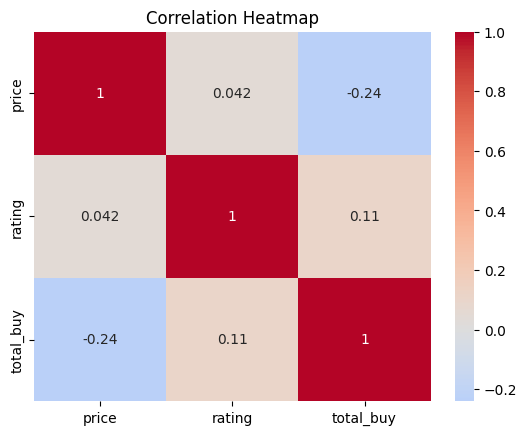

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt

# hitung korelasi
corr = testing[["price", "rating", "total_buy"]].corr()

# plot heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


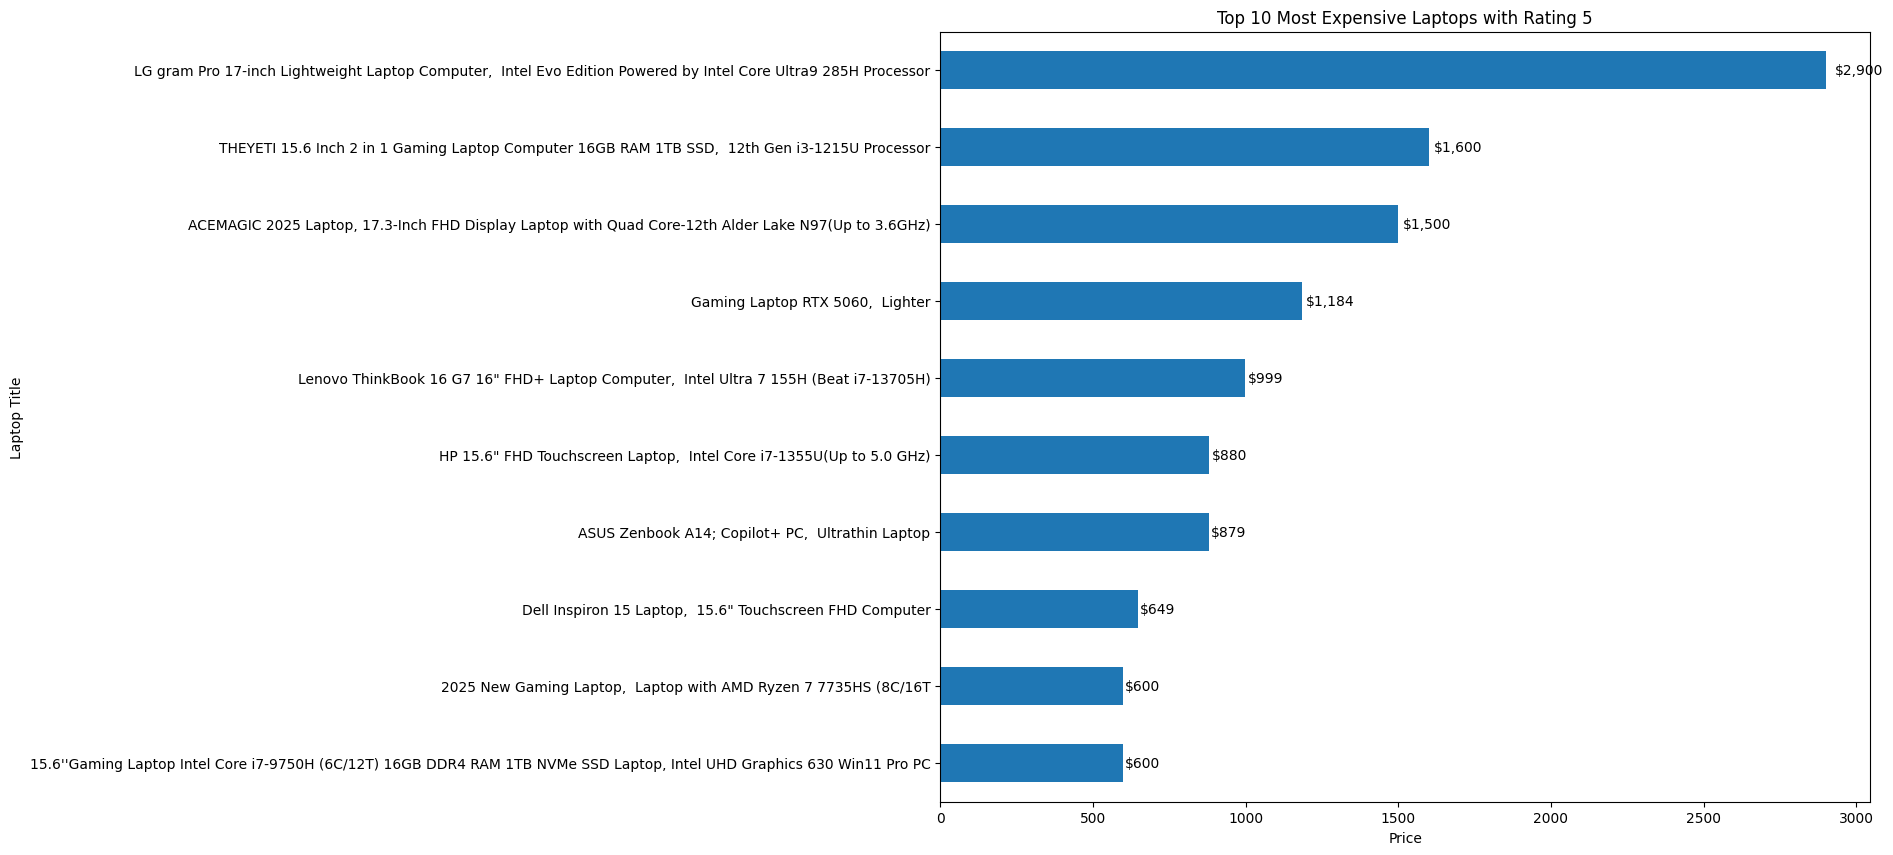

In [206]:
good_laptops = (
    testing[testing["rating"] == 5]              
    .sort_values(by="price", ascending=False)   
    .head(10)                                     
    .reset_index(drop=True)
)

ax = good_laptops.plot(
    kind="barh",
    x="title",
    y="price",
    legend=False,
    figsize=(12, 10)
)

plt.title("Top 10 Most Expensive Laptops with Rating 5")
plt.xlabel("Price")
plt.ylabel("Laptop Title")

for p in ax.patches:
    ax.text(
        p.get_width() + (p.get_width()*0.01),  
        p.get_y() + p.get_height()/2,           
        f"${p.get_width():,.0f}",              
        va="center"
    )
ax.invert_yaxis() 

plt.show()
